# Homework 3 - Problem 3

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import subprocess

# Part (a)

In [2]:
ns = [2**p for p in range(5,17)]
for n in ns:
    print(n)
    cmd = 'mpirun -n 1 hmwk3_3c -n ' + str(n) + ' --itermax 100000 --tol 1e-10'
    f = open('hmwk3_3cN' + str(n) + '.csv','w')
    process = subprocess.call(cmd.split(), stdout=f)
    f.close()

32
64
128
256
512
1024
2048
4096
8192
16384
32768
65536


             N  iterations      residual         error
32        32.0        16.0  1.559657e-14  4.815273e-03
64        64.0        32.0  4.599381e-14  1.204544e-03
128      128.0        64.0  7.503626e-14  3.011813e-04
256      256.0       128.0  1.107838e-13  7.529816e-05
512      512.0       256.0  1.418360e-13  1.882472e-05
1024    1024.0       512.0  4.231900e-13  4.706190e-06
2048    2048.0      1024.0  8.855576e-13  1.176548e-06
4096    4096.0      2048.0  2.240577e-12  2.941371e-07
8192    8192.0      4096.0  3.413523e-12  7.353428e-08
16384  16384.0      8192.0  6.141856e-12  1.838358e-08
32768  32768.0     16383.0  6.789233e-11  4.596604e-09
65536  65536.0     32767.0  1.697155e-11  1.149986e-09


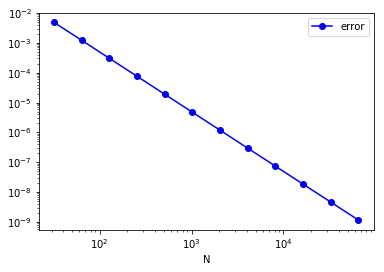

In [3]:
data = {}
columns = ['N', 'iterations', 'residual', 'error']
df = pd.DataFrame(columns=columns)
for n in [2**p for p in range(5,17)]:    
    A = np.genfromtxt('hmwk3_3cN' + str(n) + '.csv', delimiter=',')
    iterations = A[-3]
    residual = A[-2]
    error = A[-1]
    A = A[:-3]
    cells = len(A)
    h = 1/cells
    x = np.linspace(0+h/2,1-h/2,len(A))
    
    data_row = {'N': (n), 'iterations': iterations, 'residual': residual, 'error':error}
    df = df.append(pd.Series(data=data_row, name=str(n)))
print(df)
df.plot(x='N', y='error', loglog=True, style='bo-')

# Part (b)

In [4]:
ps = [1,2,4]
for p in ps:
    print(p)
    cmd = 'mpirun -n ' + str(p) + ' hmwk3_3c -n 65536 --itermax 100000 --tol 1e-10'
    f = open('hmwk3_3cp' + str(p) + '.csv','w')
    process = subprocess.call(cmd.split(), stdout=f)
    f.close()

1
2
4


In [5]:
data = {}
columns = ['Processes', 'iterations', 'residual', 'error']
df = pd.DataFrame(columns=columns)
for n in [1,2,4]:    
    A = np.genfromtxt('hmwk3_3cp' + str(p) +'.csv', delimiter=',')
    iterations = A[-3]
    residual = A[-2]
    error = A[-1]
    A = A[:-3]
    
    
    data_row = {'Processes': n, 'iterations': iterations, 'residual': residual, 'error':error}
    df = df.append(pd.Series(data=data_row, name=str(n)))
print(df)

   Processes  iterations      residual         error
1        1.0     32767.0  1.697154e-11  1.150236e-09
2        2.0     32767.0  1.697154e-11  1.150236e-09
4        4.0     32767.0  1.697154e-11  1.150236e-09
